<a href="https://colab.research.google.com/github/j-ranasinghe/Detect-Radiation-Type-using-KNN-and-Naive-Bayes/blob/main/KNN%20and%20Naive%20bayes%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve,auc

# Import the dataset 

In [10]:
cols = ["fLength","fWidth","fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [11]:
df["class"] = (df["class"]=="g").astype(int) # change the class column display 1/0

In [12]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# Data Visualization

In [13]:
print("Original Shape: ",df.shape)

Original Shape:  (19020, 11)


In [14]:
df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConcl      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class         int64
dtype: object

In [15]:
# Find NaNs and duplicates in df

print(' {} missing values '.format(df.isnull().values.sum()))
temp_energy = df.duplicated(keep='first').sum()
print(' {} duplicate rows '.format(temp_energy))
df = df.drop_duplicates()   #drop the duplicates

 0 missing values 
 115 duplicate rows 


In [16]:
#Check the distribution of the spam vs not-spam 
new_class = pd.Categorical(df["class"])
new_class = new_class.rename_categories(["Hadrons","Gamma"])              
new_class.describe()

,counts,freqs
categories,,
Hadrons,6573,0.347686
Gamma,12332,0.652314


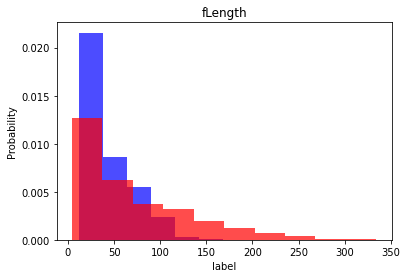

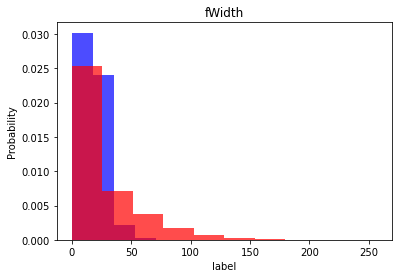

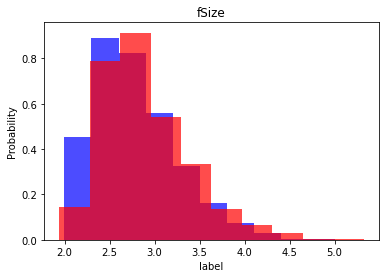

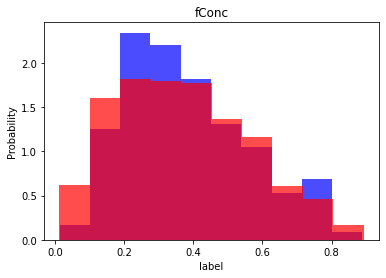

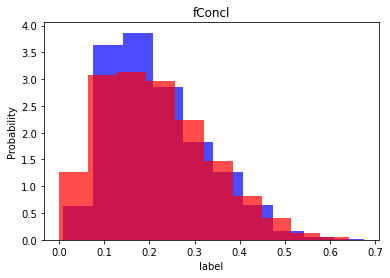

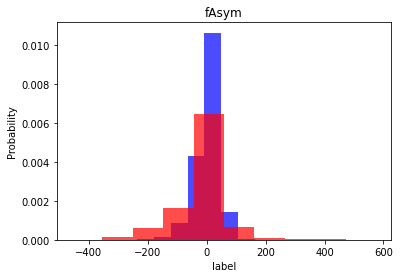

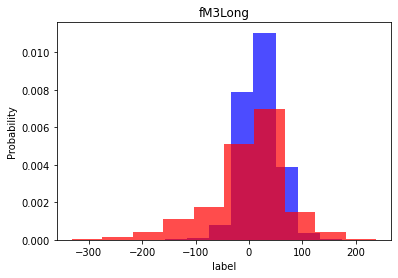

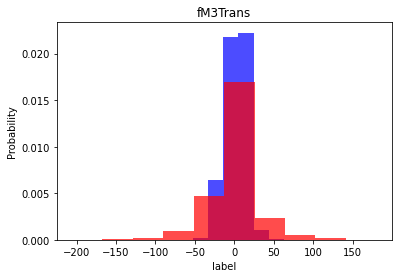

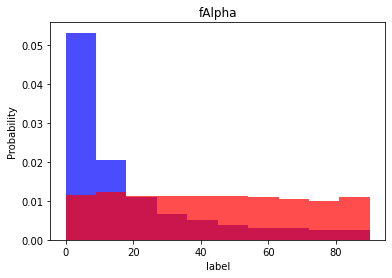

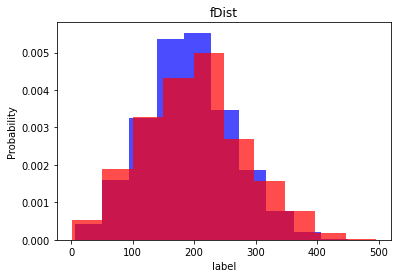

In [17]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color= 'blue',label='gamma',alpha=0.7,density = True)
  plt.hist(df[df["class"]==0][label],color= 'red',label='hadrom',alpha=0.7,density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel("label")
  plt.show()


In [18]:
# extract the features
features = df.drop('class', axis=1)
# extract the labels
labels = df['class']

In [19]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [20]:
# handle class imbalance using oversampling technique
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, labels)

#Train, test datasets


In [21]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# **KNN**

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred = knn_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3077
           1       0.92      0.86      0.89      3089

    accuracy                           0.89      6166
   macro avg       0.90      0.89      0.89      6166
weighted avg       0.90      0.89      0.89      6166



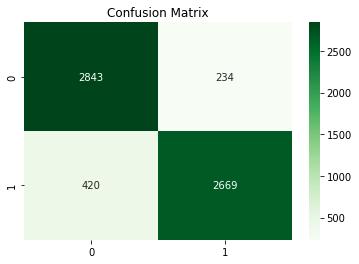

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred) # calculate the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix")
plt.show()

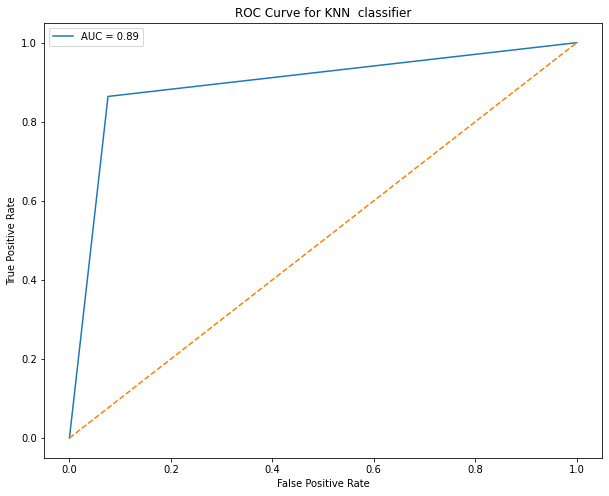

In [33]:
# calculate ROC curve for KNN classifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#Calculate the auc score for KNN classifier
auc_score = auc(fpr,tpr)

#  plotting the roc curve for KNN classifier
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for KNN  classifier')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)



---

# Naive Bayes

In [27]:
# Train and evaluate a Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [28]:
y_pred1 = bnb.predict(X_test)

In [29]:
bnb_acc = accuracy_score(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      3077
           1       0.76      0.69      0.72      3089

    accuracy                           0.73      6166
   macro avg       0.74      0.73      0.73      6166
weighted avg       0.74      0.73      0.73      6166



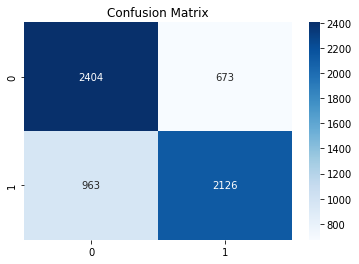

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred1) # calculate the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()

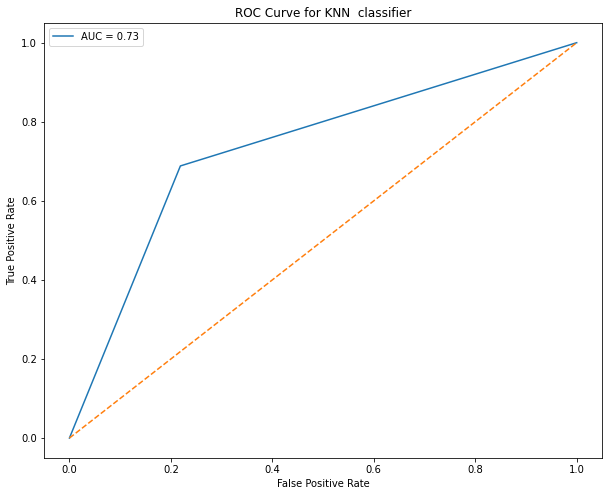

In [32]:
# calculate ROC curve for KNN classifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

#Calculate the auc score for KNN classifier
auc_score = auc(fpr,tpr)

#  plotting the roc curve for KNN classifier
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for KNN  classifier')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)